<img src="images/dem-vs-gop.jpg">

# Index

1. [Problem Statement](#PS)
2. [Data Collection](#Data)
3. [EDA](#EDA)
    1. [Data Cleaning](#Clean)
    2. [Statistics](#Stats)
4. [Modeling](#Modeling)
    1. [Flattened List Model Selection](#FLM)
    2. [Logistic Regression Model](#LRM)
    3. [Ada with CountVectorizer vs Ti-Dif](#Ada)
    4. [Ada with Title and CountVectorizer/Ti-Dif](#AdaTitle)
    5. [Column Selection/recap](#Col)
5. [Predictive Model Conclusion](#Conclusion)

## 1. Problem Statement <a id = "PS"></a>

<br>

<strong>Given the current partisan climate, understanding the vocabulary differences between the Democratic and Republican subreddits may facilitate future communication among dissonant groups. This project aims to both predict the origin of a partisan subreddit and also understand the different uses of language within these groups. Various predicitive models will be tested and data will be harvested with the Reddit API Praw.</strong>

## 2. Data Collection <a id = "Data"></a>

<br>

In [15]:
import praw
import pickle
import pandas as pd
import numpy as np
from datetime import datetime as dt

<strong>By using the Reddit API, I do not need to worry as much about limiting the data harvest as praw does it for me</strong>

In [2]:
reddit = praw.Reddit(client_id='***',
                     client_secret='***',
                     user_agent='praw', \
                     username='PrawRobot_', \
                     password='****')

In [18]:
data_dict = {}

#Collect the 1000 top Republican subreddits:
right = reddit.subreddit('republican')
right_top = right.top(limit=1000)

#Collect the 1000 top Democratic subreddits:    
left = reddit.subreddit('democrats')
left_top = left.top(limit=1000)

def data_maker(red_title, d_dict):
    for title in red_title:
        print(title) #A little progress tracker
    
        key = str(title.id) + "_" + str(title.subreddit)
        d_dict[key] = {}
        d_dict[key]["title"] = title.title
        d_dict[key]["id"] = title.id
        d_dict[key]["subreddit"] = title.subreddit
        d_dict[key]["time"] = dt.fromtimestamp(title.created).strftime('%c')
        d_dict[key]["num_comments"] = title.num_comments
        
        submission = reddit.submission(id=title.id)
        submission.comments.replace_more(limit=None)
        comments = [comment.body for comment in submission.comments.list()]
    
        d_dict[key]["comments"] = comments
        
    return(d_dict)

In [20]:
data_dict = {}

data_dict = data_maker(right_top, data_dict)
data_dict = data_maker(left_top, data_dict)

In [ ]:
data_dict = {}

#Collect the 1000 top Republican subreddits:
right = reddit.subreddit('republican')
right_top = right.top(limit=1000)

#Collect the 1000 top Democratic subreddits:    
left = reddit.subreddit('democrats')
left_top = left.top(limit=1000)

i = 0

for title in right_top:
    print(i, "\t", title) # A progress tracker
    
    key = str(title.id) + "_" + str(title.subreddit)
    data_dict[key] = {}
    data_dict[key]["title"] = title.title
    data_dict[key]["id"] = title.id
    data_dict[key]["subreddit"] = title.subreddit
    data_dict[key]["time"] = dt.fromtimestamp(title.created).strftime('%c')
    data_dict[key]["num_comments"] = title.num_comments
    
    submission = reddit.submission(id=title.id)
    submission.comments.replace_more(limit=None)
    comments = [comment.body for comment in submission.comments.list()]
    
    data_dict[key]["comments"] = comments
    i += 1

In [284]:
data_dict = {}

#Collect the 1000 top Republican subreddits:
right = reddit.subreddit('republican')
right_top = right.top(limit=1000)
i = 0

for title in right_top:
    print(i, "\t", title) # A progress tracker
    
    key = str(title.id) + "_" + str(title.subreddit)
    data_dict[key] = {}
    data_dict[key]["title"] = title.title
    data_dict[key]["id"] = title.id
    data_dict[key]["subreddit"] = title.subreddit
    data_dict[key]["time"] = dt.fromtimestamp(title.created).strftime('%c')
    data_dict[key]["num_comments"] = title.num_comments
    
    submission = reddit.submission(id=title.id)
    submission.comments.replace_more(limit=None)
    comments = [comment.body for comment in submission.comments.list()]
    
    data_dict[key]["comments"] = comments
    i += 1

#Collect the 1000 top Democratic subreddits:    
left = reddit.subreddit('democrats')
left_top = left.top(limit=1000)

for title in left_top:
    print(i) # A progress tracker
    
    key = str(title.id) + "_" + str(title.subreddit)
    data_dict[key] = {}
    data_dict[key]["title"] = title.title
    data_dict[key]["id"] = title.id
    data_dict[key]["subreddit"] = title.subreddit
    data_dict[key]["time"] = dt.fromtimestamp(title.created).strftime('%c')
    data_dict[key]["num_comments"] = title.num_comments
    
    submission = reddit.submission(id=title.id)
    submission.comments.replace_more(limit=None)
    comments = [comment.body for comment in submission.comments.list()]
    
    data_dict[key]["comments"] = comments
    i += 1 
    
df = pd.DataFrame(data_dict).T

#Back up data collection 
with open("rep_dem_df.pkl","wb") as f:
    pickle.dump(df,f)

0 	 atkbwd
1 	 axz3oi
2 	 ao4pso
3 	 asul6v
4 	 aemlra
5 	 av19dd
6 	 aizbuk
7 	 arlssn
8 	 aw7qz1
9 	 an2ujz
10 	 at5sza
11 	 aulyhb
12 	 awm1k3
13 	 avg3om
14 	 ahu3ge
15 	 b29czb
16 	 9v0wvf
17 	 amgq3y
18 	 az76gm
19 	 auahip
20 	 aqkhlw
21 	 anve66
22 	 anacem
23 	 9dmmm6
24 	 aci274
25 	 aq9vay
26 	 b1tfuc
27 	 9s12dq
28 	 apt4nm
29 	 a3dmab
30 	 b825l2
31 	 azmits
32 	 b17euh
33 	 ap44xf
34 	 araulh
35 	 ax0y6l
36 	 apmlvw
37 	 94iyq4
38 	 ajsq10
39 	 9qp1hp
40 	 akrmty
41 	 axqi7t
42 	 b27j8y
43 	 b9u8yc
44 	 azx3pp
45 	 9uj3zf
46 	 amrsy3
47 	 9k34vl
48 	 b3j5dn
49 	 b1m5hb
50 	 9lz4rv
51 	 apeu59
52 	 b631ow
53 	 ax75j6
54 	 9v9vro
55 	 aydfsc
56 	 9xd9oo
57 	 b2io2y
58 	 b0pogh
59 	 9u2yg5
60 	 aquxek
61 	 9wdoc5
62 	 b5uqfi
63 	 9425em
64 	 aosn9y
65 	 9rx8jv
66 	 atuoim
67 	 aoyd0t
68 	 9h4wk6
69 	 b0z0vh
70 	 aofky0
71 	 9flbyr
72 	 am3ovs
73 	 anipvf
74 	 b8vsmm
75 	 axdq45
76 	 b31yez
77 	 9q8q95
78 	 ajdbns
79 	 9ht83p
80 	 9xyjp0
81 	 akipwt
82 	 9mgm7v
83 	 8vs9j4
84

640 	 9cw1lx
641 	 9eegj0
642 	 9bgcs7
643 	 87pbi8
644 	 au3kvp
645 	 8j6khc
646 	 85sjmt
647 	 6eplot
648 	 7l45w3
649 	 6l7z49
650 	 8sme6o
651 	 7snh08
652 	 5c2f8o
653 	 1ito8k
654 	 7pgkxe
655 	 b3xdn7
656 	 aolt68
657 	 ak3ebl
658 	 887p2l
659 	 7oljbj
660 	 za73x
661 	 9kx156
662 	 85lj3z
663 	 4rnnq1
664 	 9gxecl
665 	 895axq
666 	 ay0j3h
667 	 ahjdmn
668 	 10xyfb
669 	 1irlr2
670 	 9b99kz
671 	 97ohe4
672 	 8pslsy
673 	 42tr1o
674 	 8pn2m5
675 	 8jcqxb
676 	 8ciu4x
677 	 4h6obe
678 	 1rxcrj
679 	 9uvb0k
680 	 98tiel
681 	 a26l0h
682 	 8082b8
683 	 11x0da
684 	 8y9re3
685 	 89ccqj
686 	 7b1w5y
687 	 6teauc
688 	 agcgbq
689 	 akg10j
690 	 9gjt43
691 	 996v1e
692 	 7bgt8i
693 	 98c3mu
694 	 8ksmem
695 	 82oarb
696 	 9hpvm9
697 	 11btgd
698 	 sk7sp
699 	 8vro52
700 	 8rajg5
701 	 7baxvf
702 	 4uivhj
703 	 a0knom
704 	 7zwnp6
705 	 7dewv7
706 	 1eb5em
707 	 15c5j4
708 	 9eoh48
709 	 11dk5a
710 	 89yptj
711 	 11oyn2
712 	 9f6n3g
713 	 9786cc
714 	 8iyjlp
715 	 5qx5ez
716 	 8wes5f
7

KeyboardInterrupt: 

In [24]:
with open ("rep_dem_df.pkl","rb") as f:
    df = pickle.load(f)

In [25]:
#Head and Tail of Dataframe
df["target"] = df["subreddit"].apply(lambda a: 1 if a == "democrats" else 0)
df.tail(2).append(df.head(2))

,comments,id,num_comments,subreddit,time,title,target
8nbfwl_democrats,[Why bother lying about such things? Why can’t...,8nbfwl,50,democrats,Wed May 30 15:27:11 2018,Trump places Nashville rally crowd size above ...,1
7rft0w_democrats,[That whole family values thing was a lie just...,7rft0w,21,democrats,Thu Jan 18 23:21:04 2018,Keep a record of their treachery and hypocrisy.,1
atkbwd_Republican,"[Also r/politicalhumor, When I first joined re...",atkbwd,129,Republican,Fri Feb 22 12:30:39 2019,Thought you guys might like this,0
axz3oi_Republican,"[18 U.S. Code § 2381. Treason\nWhoever, owing ...",axz3oi,158,Republican,Wed Mar 6 08:57:51 2019,I’m sure everyone agrees to not let her back i...,0


In [26]:
#Base Line Accuracy of Democrat vs Republican
df["target"].value_counts()

1    997
0    996
Name: target, dtype: int64

## 3. EDA<a id = "EDA"></a>

<br>

### 3a. Data Cleaning <a id = "Clean"></a>

<strong>The following warning needs to be scrubbed from Republican posts, otherwise it would bias the model</strong> 

In [27]:
df[df["subreddit"] == "Republican"]["comments"]["b29czb_Republican"][0]

"/r/Republican is a partisan subreddit.  This is a place for Republicans to discuss issues with other Republicans.\nOut of respect for this sub's main purpose, we ask that unless you identify as Republican that you refrain from commenting and [leave the vote button alone](https://www.reddit.com/r/MetaRepublican/comments/5t017a/this_sub_is_for_republicans_if_you_do_not/). Non republicans who come to our sub looking for a 'different perspective' [subvert that very perspective with their own views when they vote or comment.](http://i.imgur.com/XqL0wfR.jpg)\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Republican) if you have any questions or concerns.*"

In [28]:
robot_warning = df["comments"]["b29czb_Republican"][0]

In [29]:
df["comments"]["b29czb_Republican"][0] == robot_warning

True

<strong>Some Reddit comments are images and need to be accounted for, before iterating through list</strong> 

In [30]:
df["num_text_comments"] = df["comments"].apply(lambda a: len(a))

In [31]:
df[df["num_text_comments"] == 0]

,comments,id,num_comments,subreddit,time,title,target,num_text_comments
aoipiz_democrats,[],aoipiz,3,democrats,Fri Feb 8 12:16:14 2019,Georgia voters suing for paper ballots win app...,1,0


In [32]:
df.drop("aoipiz_democrats", inplace = True)

In [33]:
for i in df.index:
    if df["comments"][i][0] == robot_warning:
        del df["comments"][i][0] #Deletes robot text off list

In [34]:
df["comments"]["b29czb_Republican"][0]

'That photo was taken in 2010'

In [35]:
df["num_comments"] = df["num_comments"].apply(float)
df["flat_comments"] = df["comments"].apply(lambda a: str(a)[1:-1])
df["len_flat_comments"] = df["flat_comments"].apply(len)

In [36]:
df.head()

,comments,id,num_comments,subreddit,time,title,target,num_text_comments,flat_comments,len_flat_comments
atkbwd_Republican,"[Also r/politicalhumor, When I first joined re...",atkbwd,129.0,Republican,Fri Feb 22 12:30:39 2019,Thought you guys might like this,0,115,"'Also r/politicalhumor', 'When I first joined ...",11909
axz3oi_Republican,"[18 U.S. Code § 2381. Treason\nWhoever, owing ...",axz3oi,158.0,Republican,Wed Mar 6 08:57:51 2019,I’m sure everyone agrees to not let her back i...,0,154,"'18 U.S. Code §\u202f2381. Treason\nWhoever, o...",25035
ao4pso_Republican,[Is Evan even important? I’ve never heard of t...,ao4pso,189.0,Republican,Thu Feb 7 10:14:43 2019,Disgusting!,0,164,'Is Evan even important? I’ve never heard of t...,23942
asul6v_Republican,"[[removed], [removed], Interesting format, Thi...",asul6v,202.0,Republican,Wed Feb 20 17:13:54 2019,We all know its true,0,173,"'[removed]', '[removed]', 'Interesting format'...",33335
aemlra_Republican,"[[deleted], Alcoholism isn't your fault\n\nDru...",aemlra,203.0,Republican,Thu Jan 10 14:41:38 2019,Keep up guys,0,191,"'[deleted]', ""Alcoholism isn't your fault\n\nD...",47553


### 3b. Statistics<a id = "Stats"></a>

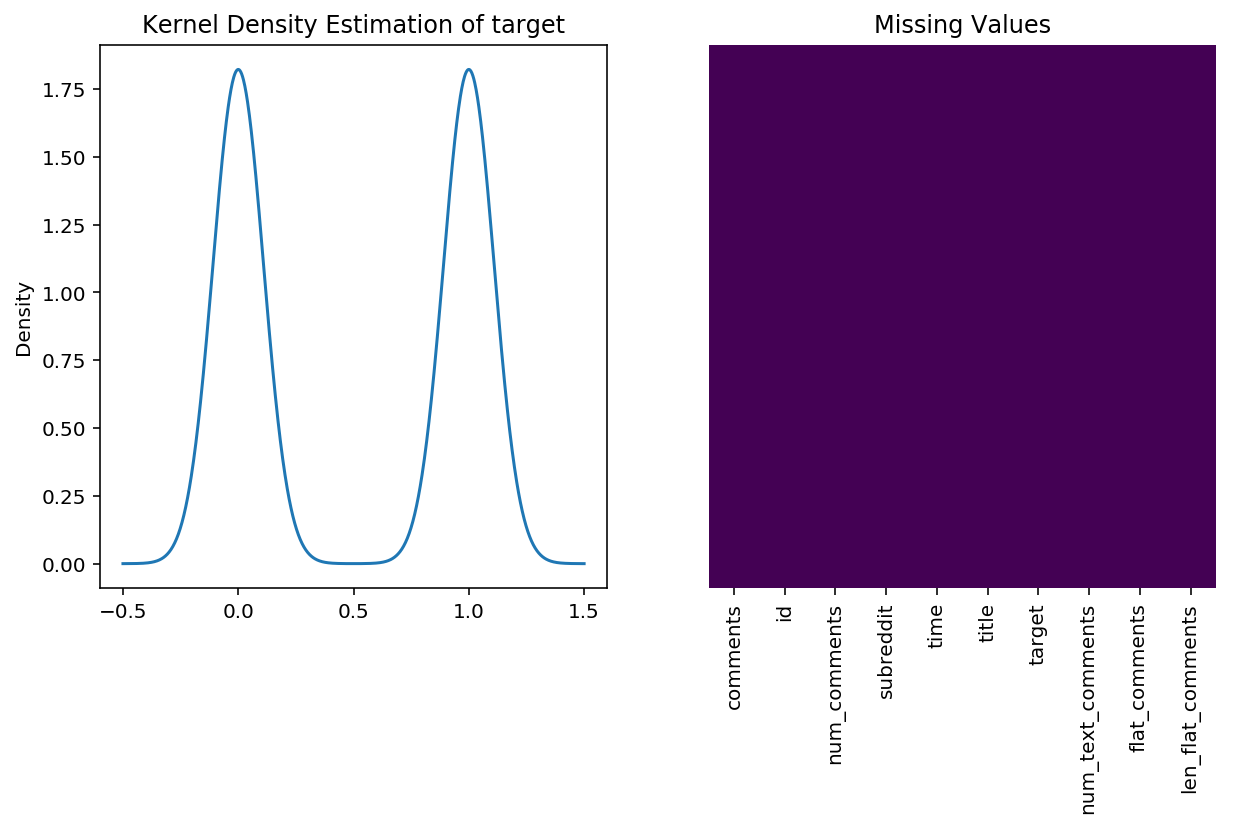

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].set_title("Kernel Density Estimation of target");
df["target"].plot.kde(ax = ax[0],);

ax[1].set_title("Missing Values");
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax = ax[1]);

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, atkbwd_Republican to 7rft0w_democrats
Data columns (total 10 columns):
comments             1992 non-null object
id                   1992 non-null object
num_comments         1992 non-null float64
subreddit            1992 non-null object
time                 1992 non-null object
title                1992 non-null object
target               1992 non-null int64
num_text_comments    1992 non-null int64
flat_comments        1992 non-null object
len_flat_comments    1992 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 251.2+ KB


In [39]:
df.describe()

,num_comments,target,num_text_comments,len_flat_comments
count,1992.000000,1992.000000,1992.000000,1992.000000
mean,67.589859,0.500000,64.006024,13271.000502
std,81.031850,0.500126,79.141901,19778.408832
min,1.000000,0.000000,1.000000,0.000000
25%,26.000000,0.000000,24.000000,3588.500000
50%,46.000000,0.500000,42.000000,7673.000000
75%,79.000000,1.000000,74.000000,15392.500000
max,1291.000000,1.000000,1290.000000,375246.000000


In [42]:
df = df[df["len_flat_comments"] != 0]

In [44]:
#Remove the last straggler
df["flat_comments"] = df["comments"].apply(lambda a: str(a)[1:-1])

## 4. Modeling<a id = "Modeling"></a>

<br>

In [21]:
df.columns

Index(['comments', 'id', 'num_comments', 'subreddit', 'time', 'title',
       'target', 'num_text_comments', 'flat_comments', 'len_flat_comments'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split

#I don't need to strip the index values, but for the initial modeling
#I will, just in case "republican" addition informs model inappropriately.

X = df[["comments",
        "flat_comments",
        "num_text_comments",
        "len_flat_comments",
        "title"]].reset_index(drop=True).copy()

y = df["target"].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 88,
                                                   stratify = y)

### 4a. Flattened List Model<a id = "FLM"></a>

In [23]:
#A quick sanity check
print(X_train.index[0:5])
print(y_train.index[0:5])

Int64Index([1381, 1190, 1704, 327, 1415], dtype='int64')
Int64Index([1381, 1190, 1704, 327, 1415], dtype='int64')


<strong>Flattening X to review only comments</strong>

In [24]:
X_flat_train, X_flat_test = X_train["flat_comments"], X_test["flat_comments"]

In [25]:
len(X_flat_train)

1493

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC

In [48]:
models = {
    "lr" : LogisticRegression(n_jobs=3),
    "svc": SVC(),
    "ada": AdaBoostClassifier(),
    "bnb": BernoulliNB(),
    "gbc": GradientBoostingClassifier()}

params = {
    "lr" :{
        "solver"            : ["newton-cg", "lbfgs"],
        "multi_class"       : ["ovr", "multinomial"]},
    "svc":{
        "gamma"             : ["scale"]},
    "ada":{
         "n_estimators"     : [50, 500],
         "learning_rate"    : [1,.5]},
    "bnb":{},
    "gbc":{}}

In [277]:
for model in models:
    pipe = Pipeline([
        ("cvec", CountVectorizer()),
        ("grid", GridSearchCV(models[model], 
                              params[model],
                              cv = 3,
                              n_jobs = 3,
                              verbose = 2))
    ])

    cvec_params = {
        "cvec__stop_words":[None],
        "cvec__max_features":[7_500,10_000, 25_000],
        "cvec__stop_words": [(1,1),(2,2)],
        "cvec__max_df": [.8],
        "cvec__min_df": [.01]}

    gs = GridSearchCV(pipe,
                      param_grid=cvec_params,
                      cv = 3,
                      n_jobs = 3,
                      verbose = 2)

    gs.fit(X_flat_train, y_train)
    print(model, gs.best_score_)
    print(gs.best_params_)

In [75]:
# Relevent Model values

# rfc 0.8452779638312123
# {'cvec__max_df': 0.8, 
#  'cvec__max_features': 50000, 
#  'cvec__min_df': 0.01, 
#  'cvec__stop_words': (1, 3)}

# lr 0.8459477561955794
# {'cvec__max_df': 0.8, 
#  'cvec__max_features': 10000, 
#  'cvec__min_df': 0.01,
#  'cvec__stop_words': (1, 1)}

# svc 0.7494976557267247
# {'cvec__max_df': 0.8, 
#  'cvec__max_features': 10000, 
#  'cvec__min_df': 0.01, 
#  'cvec__stop_words': (1, 1)}

# ada 0.854655056932351
# {'cvec__max_df': 0.8, 
#  'cvec__max_features': 10000, 
#  'cvec__min_df': 0.01, 
#  'cvec__stop_words': (1, 1)}

In [56]:
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("lr", LogisticRegression())
])

params = {
    "cvec__stop_words":[None],
    "cvec__max_features":[35_000, 45_000],
    "cvec__stop_words": [(1,1),(1,3)],
    "cvec__max_df": [.75,.8],
    "cvec__min_df": [.01],
    "lr__solver":['sag'],
    "lr__max_iter": [300,500],
    "lr__C": [4,5,6]}

gs = GridSearchCV(pipe,
                  param_grid=params,
                  cv = 3,
                  n_jobs = 3)

gs.fit(X_flat_train, y_train)
print(model, gs.best_score_)
print(gs.best_params_)

svc 0.8573342263898192
{'cvec__max_df': 0.75, 'cvec__max_features': 35000, 'cvec__min_df': 0.01, 'cvec__stop_words': (1, 1), 'lr__C': 4, 'lr__max_iter': 300, 'lr__solver': 'sag'}


/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [57]:
gs.score(X_flat_train, y_train)

0.9591426657736102

In [58]:
gs.score(X_flat_test, y_test)

0.8232931726907631

In [64]:
from sklearn.metrics import classification_report

pred = gs.predict(X_flat_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       249
           1       0.80      0.86      0.83       249

   micro avg       0.82      0.82      0.82       498
   macro avg       0.82      0.82      0.82       498
weighted avg       0.82      0.82      0.82       498



In [67]:
from sklearn.metrics import confusion_matrix

pred = gs.predict(X_flat_test)
print(confusion_matrix(y_test, pred))

[[196  53]
 [ 35 214]]


In [69]:
#One more large grid search with LR

pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("lr", LogisticRegression())
])

params = {
    "cvec__stop_words":[None],
    "cvec__max_features":[34_000, 35_000, 35_500, 36_000, 37_000],
    "cvec__stop_words": [(1,1),(1,2),(2,2),(1,3)],
    "cvec__max_df": [.75,.8],
    "cvec__min_df": [.01,.02,.03,.04,.05,.06,.07,.08,.09],
    "lr__solver":['sag'],
    "lr__max_iter": [100],
    "lr__C": [3,2,4]}

gs = GridSearchCV(pipe,
                  param_grid=params,
                  cv = 5,
                  n_jobs = 3,
                  verbose=4)

gs.fit(X_flat_train, y_train)
print(model, gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:   40.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done 215 tasks      | elapsed:  7.1min
[Parallel(n_jobs=3)]: Done 386 tasks      | elapsed: 12.5min
[Parallel(n_jobs=3)]: Done 607 tasks      | elapsed: 19.5min
[Parallel(n_jobs=3)]: Done 876 tasks      | elapsed: 28.1min
[Parallel(n_jobs=3)]: Done 1195 tasks      | elapsed: 38.3min
[Parallel(n_jobs=3)]: Done 1562 tasks      | elapsed: 50.0min
[Parallel(n_jobs=3)]: Done 1979 tasks      | elapsed: 63.5min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed: 78.5min
[Parallel(n_jobs=3)]: Done 2959 tasks      | elapsed: 95.2min
[Parallel(n_jobs=3)]: Done 3522 tasks      | elapsed: 113.4min
[Parallel(n_jobs=3)]: Done 4135 tasks      | elapsed: 133.0min
[Parallel(n_jobs=3)]: Done 4796 tasks      | elapsed: 154.2min
[Parallel(n_jobs=3)]: Done 5400 out of 5400 | elapsed: 173.7

svc 0.8472873409243135
{'cvec__max_df': 0.75, 'cvec__max_features': 34000, 'cvec__min_df': 0.01, 'cvec__stop_words': (2, 2), 'lr__C': 4, 'lr__max_iter': 100, 'lr__solver': 'sag'}


/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [71]:
gs.score(X_flat_train,y_train)

0.9216342933690556

In [72]:
gs.score(X_flat_test,y_test)

0.8072289156626506

### 4b. Logistic Regression<a id = "LRM"></a>

<strong>Grid search different parameters</strong>

In [89]:
cvec = CountVectorizer(ngram_range=(1,1),
                       stop_words=None,
                       max_features=35_000,
                       max_df = .79,
                       min_df = .01)

cvec.fit(X_flat_train)

X_Flat_Co_train = cvec.transform(X_flat_train)
X_Flat_Co_train = pd.DataFrame(X_Flat_Co_train.toarray(),
                               columns=cvec.get_feature_names())

X_Flat_Co_test = cvec.transform(X_flat_test)
X_Flat_Co_test = pd.DataFrame(X_Flat_Co_test.toarray(),
                               columns=cvec.get_feature_names())

cvec_sum = pd.DataFrame(X_Flat_Co_train.sum(), columns=["count"]).sort_values("count")

cvec_sum.tail(5)

,count
than,7000
my,7951
his,8977
your,10838
trump,11144


In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=4, max_iter=300, solver='sag')

lr.fit(X_Flat_Co_train, y_train)

/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
lr.score(X_Flat_Co_test, y_test)

0.8353413654618473

<strong>Review bettas of different words</strong>

In [103]:
for i in range(len(X_Flat_Co_test.columns)):
    if abs(lr.coef_[0][i]) > .1:
        print(X_Flat_Co_test.columns[i],lr.coef_[0][i])

comments -0.10942689931862493
fuck 0.1082264564603267
fucking 0.2069304125816288
gop 0.1409671552305344
left -0.1207941861192518
politics -0.10954234635343972
republican -0.1260557221338799
republicans 0.11210272043550856
trump 0.10976874317459778


In [104]:
pred = lr.predict(X_Flat_Co_test)

In [105]:
print(confusion_matrix(y_test, pred))

[[206  43]
 [ 39 210]]


In [ ]:
plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

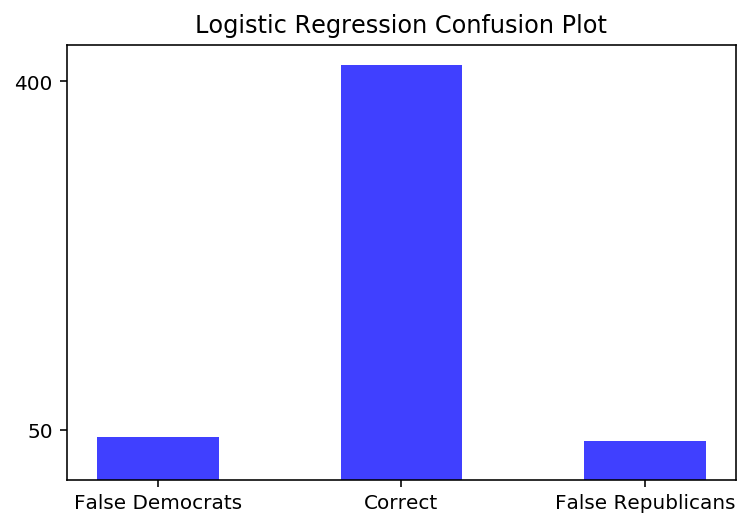

In [133]:
confusion_plt = (y_test - pred).values
plt.hist(confusion_plt, 5, facecolor='b', alpha=0.75);

plt.xlabel('');
plt.ylabel('');
plt.title('Logistic Regression Confusion Plot');
plt.xticks([-.8,0,.8],["False Democrats","Correct","False Republicans"]);
plt.yticks([400,50]);

<strong>While the logistic model is interpretable, this model is very overfit. What follows is an exploration other models</strong>

## 4c. Ada with CountVectorizer vs Ti-Dif <a id = "Ada"></a>

In [134]:
from sklearn.feature_extraction.text import TfidfTransformer

<strong>Grid search different Ada parameters</strong>

In [135]:
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("ada", AdaBoostClassifier())
])

params = {
    "cvec__stop_words":[None],
    "cvec__max_features":[10_000, 20_000, 35_000],
    "cvec__stop_words": [(1,1),(1,2),(2,2)],
    "cvec__max_df": [.75,.8],
    "cvec__min_df": [.001,.01],
    "ada__n_estimators"     : [10,50],
    "ada__learning_rate"    : [1,.5]}

gs = GridSearchCV(pipe,
                  param_grid=params,
                  cv = 3,
                  n_jobs = 3,
                  verbose=4)

gs.fit(X_flat_train, y_train)
print(model, gs.best_score_)
print(gs.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:   34.2s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done 215 tasks      | elapsed:  7.0min
[Parallel(n_jobs=3)]: Done 386 tasks      | elapsed: 12.4min
[Parallel(n_jobs=3)]: Done 432 out of 432 | elapsed: 14.1min finished


svc 0.8519758874748827
{'ada__learning_rate': 0.5, 'ada__n_estimators': 50, 'cvec__max_df': 0.75, 'cvec__max_features': 10000, 'cvec__min_df': 0.001, 'cvec__stop_words': (1, 1)}


In [163]:
cvec = CountVectorizer(ngram_range=(1,1),
                       stop_words=None,
                       max_features=10_000,
                       max_df = .75,
                       min_df = .001)

cvec.fit(X_flat_train)

X_Flat_Co_train = cvec.transform(X_flat_train)
X_Flat_Co_train = pd.DataFrame(X_Flat_Co_train.toarray(),
                               columns=cvec.get_feature_names())

X_Flat_Co_test = cvec.transform(X_flat_test)
X_Flat_Co_test = pd.DataFrame(X_Flat_Co_test.toarray(),
                               columns=cvec.get_feature_names())

ada = AdaBoostClassifier(n_estimators = 50,
                         learning_rate=0.5)

ada.fit(X_Flat_Co_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=None)

In [141]:
print(ada.score(X_Flat_Co_train, y_train))

0.8968519758874749
[0. 0. 0. ... 0. 0. 0.]


<strong>Most important Ada classifier words</strong>

In [274]:
word_list = []

for i in range(len(ada.feature_importances_)):
    if ada.feature_importances_[i] > .04:
        print(X_Flat_Co_test.columns[i],ada.feature_importances_[i])
        word_list.append(X_Flat_Co_test.columns[i])

00 0.262
000 0.238
01 0.274
02 0.226


In [155]:
pred = ada.predict(X_Flat_Co_test)
print(ada.score(X_Flat_Co_test,y_test))
print(confusion_matrix(y_test, pred))

0.8473895582329317
[[219  30]
 [ 46 203]]


<strong>Adding Tf-Idf makes transform more overfit</strong>

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
tfidv = TfidfVectorizer(ngram_range=(1,1),
                       stop_words=None,
                       max_features=10_000,
                       max_df = .75,
                       min_df = .001)

tfidv.fit(X_flat_train)

X_Flat_Co_train = tfidv.transform(X_flat_train)
X_Flat_Co_train = pd.DataFrame(X_Flat_Co_train.toarray(),
                               columns=tfidv.get_feature_names())

X_Flat_Co_test = tfidv.transform(X_flat_test)
X_Flat_Co_test = pd.DataFrame(X_Flat_Co_test.toarray(),
                               columns=cvec.get_feature_names())

ada = AdaBoostClassifier(n_estimators = 50,
                         learning_rate=0.5)

ada.fit(X_Flat_Co_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=None)

In [158]:
print(ada.score(X_Flat_Co_train, y_train))

0.9089082384460817


<strong>Interesting to see how Ti-dif negatively effects this particular model</strong>

In [160]:
ada.score(X_Flat_Co_test, y_test)

0.8313253012048193

## 4d. Ada with Title and CountVectorizer/Ti-Dif<a id = "AdaTitle"></a>

<strong>Rebuilding Ada Model, just in case.</strong>

In [165]:
cvec = CountVectorizer(ngram_range=(1,1),
                       stop_words=None,
                       max_features=10_000,
                       max_df = .75,
                       min_df = .001)

cvec.fit(X_flat_train)

X_Flat_Co_train = cvec.transform(X_flat_train)
X_Flat_Co_train = pd.DataFrame(X_Flat_Co_train.toarray(),
                               columns=cvec.get_feature_names())

X_Flat_Co_test = cvec.transform(X_flat_test)
X_Flat_Co_test = pd.DataFrame(X_Flat_Co_test.toarray(),
                               columns=cvec.get_feature_names())

ada = AdaBoostClassifier(n_estimators = 50,
                         learning_rate=0.5)

ada.fit(X_Flat_Co_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=None)

<strong>Adding the Ada predictions as a column to X</strong>

In [184]:
ada_comment_pred_train = [x[0] for x in ada.predict_proba(X_Flat_Co_train)]
ada_comment_pred_test = [x[0] for x in ada.predict_proba(X_Flat_Co_test)]

In [185]:
X_train["ada_comment_pred"] = ada_comment_pred_train
X_test["ada_comment_pred"] = ada_comment_pred_test

/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [187]:
X_train.head(3)

,comments,flat_comments,num_text_comments,len_flat_comments,title,ada_comment_pred
1381,"[WHERE DO I FUCKING DONATE, I live in Kentucky...","'WHERE DO I FUCKING DONATE', ""I live in Kentuc...",32,5088,Campaign to draft Democratic challenger to McC...,0.492625
1190,[Can't even Nazi correctly because they didn't...,"""Can't even Nazi correctly because they didn't...",126,33857,"Rocket launcher, pipe bombs and hundreds of fi...",0.416326
1704,[I'm not baffled by it. I'm baffled by anyone ...,"""I'm not baffled by it. I'm baffled by anyone ...",55,8441,"Mark Warner on Twitter: ""The President’s reluc...",0.478907


In [218]:
X_title_train, X_title_test = X_train["title"], X_test["title"]

In [190]:
models = {
    "lr" : LogisticRegression(n_jobs=3),
    "ada": AdaBoostClassifier()}

for model in models:
    print(model)

lr
ada


<strong>Ti-Fid transform</strong>

In [222]:
models = {
    "lr" : LogisticRegression(n_jobs=3),
    "ada": AdaBoostClassifier()}

params = {
    "lr" :{
        "solver"            : ["newton-cg", "lbfgs"],
        "multi_class"       : ["ovr", "multinomial"]},
    "ada":{
         "n_estimators"     : [10, 25],
         "learning_rate"    : [1,.5]}}

for model in models:
    pipe = Pipeline([
        ("tfid", TfidfVectorizer()),
        ("grid", GridSearchCV(models[model], 
                              params[model],
                              cv = 2,
                              n_jobs = 3,
                              verbose = 2))
    ])

    tfid_params = {
        "tfid__stop_words":[None],
        "tfid__ngram_range": [(1,1),(1,2)],
        "tfid__max_features":[None],
        "tfid__max_df": [.99,.9],
        "tfid__min_df": [.01,.001]}

    gs = GridSearchCV(pipe,
                      param_grid=tfid_params,
                      cv = 3,
                      n_jobs = 3,
                      verbose = 2)

    gs.fit(X_title_train, y_train)
    print(model, gs.best_score_)
    print(gs.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:    5.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


lr 0.6858673811118553
{'tfid__max_df': 0.99, 'tfid__max_features': None, 'tfid__min_df': 0.001, 'tfid__ngram_range': (1, 1), 'tfid__stop_words': None}
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:    5.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s


Fitting 2 folds for each of 4 candidates, totalling 8 fits
ada 0.6389819156061621
{'tfid__max_df': 0.99, 'tfid__max_features': None, 'tfid__min_df': 0.01, 'tfid__ngram_range': (1, 2), 'tfid__stop_words': None}


[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.2s finished


<strong>Count Vectorizer Title transform</strong>

In [223]:
models = {
    "lr" : LogisticRegression(n_jobs=3),
    "ada": AdaBoostClassifier()}

params = {
    "lr" :{
        "solver"            : ["newton-cg", "lbfgs"],
        "multi_class"       : ["ovr", "multinomial"]},
    "ada":{
         "n_estimators"     : [10, 25],
         "learning_rate"    : [1,.5]}}

for model in models:
    pipe = Pipeline([
        ("cvec", CountVectorizer()),
        ("grid", GridSearchCV(models[model], 
                              params[model],
                              cv = 2,
                              n_jobs = 3,
                              verbose = 2))
    ])

    cvec_params = {
        "cvec__stop_words":[None],
        "cvec__ngram_range": [(1,1),(1,2)],
        "cvec__max_features":[None],
        "cvec__max_df": [.99,.9],
        "cvec__min_df": [.01,.001]}

    gs = GridSearchCV(pipe,
                      param_grid=cvec_params,
                      cv = 3,
                      n_jobs = 3,
                      verbose = 2)

    gs.fit(X_title_train, y_train)
    print(model, gs.best_score_)
    print(gs.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:    6.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


lr 0.679839249832552
{'cvec__max_df': 0.99, 'cvec__max_features': None, 'cvec__min_df': 0.001, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:    5.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s


Fitting 2 folds for each of 4 candidates, totalling 8 fits
ada 0.6423308774279973
{'cvec__max_df': 0.99, 'cvec__max_features': None, 'cvec__min_df': 0.001, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}


[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.2s finished


<strong>LR with TFID best, fitting with grid seaerch below</stong>

In [225]:
#One more large grid search with LR

pipe = Pipeline([
    ("tfid", TfidfVectorizer()),
    ("lr", LogisticRegression())
])


params = {
    "tfid__stop_words":[None],
    "tfid__stop_words": [(1,1)],
    "tfid__max_df": [.90,.99],
    "tfid__min_df": [.001],
    "lr__solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "lr__max_iter": [100,300],
    "lr__C": [1,2,3,4]}

gs = GridSearchCV(pipe,
                  param_grid=params,
                  cv = 5,
                  n_jobs = 3,
                  verbose=4)

gs.fit(X_title_train, y_train)
print(model, gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done 159 tasks      | elapsed:    4.7s


ada 0.6972538513060951
{'lr__C': 1, 'lr__max_iter': 300, 'lr__solver': 'saga', 'tfid__max_df': 0.9, 'tfid__min_df': 0.001, 'tfid__stop_words': (1, 1)}


[Parallel(n_jobs=3)]: Done 395 out of 400 | elapsed:   10.1s remaining:    0.1s
[Parallel(n_jobs=3)]: Done 400 out of 400 | elapsed:   10.2s finished


In [226]:
gs.score(X_title_test,y_test)

0.7008032128514057

In [233]:
lr_title_pred_train = [x[0] for x in gs.predict_proba(X_title_train)]
lr_title_pred_test = [x[0] for x in gs.predict_proba(X_title_test)]

In [234]:
X_train["lr_title_pred"] = lr_title_pred_train
X_test["lr_title_pred"] = lr_title_pred_test

/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [235]:
X_train.head()

,comments,flat_comments,num_text_comments,len_flat_comments,title,ada_comment_pred,lr_title_pred
1381,"[WHERE DO I FUCKING DONATE, I live in Kentucky...","'WHERE DO I FUCKING DONATE', ""I live in Kentuc...",32,5088,Campaign to draft Democratic challenger to McC...,0.492625,0.380779
1190,[Can't even Nazi correctly because they didn't...,"""Can't even Nazi correctly because they didn't...",126,33857,"Rocket launcher, pipe bombs and hundreds of fi...",0.416326,0.394937
1704,[I'm not baffled by it. I'm baffled by anyone ...,"""I'm not baffled by it. I'm baffled by anyone ...",55,8441,"Mark Warner on Twitter: ""The President’s reluc...",0.478907,0.191864
327,"[Registered dem here, also voted Johnson., Whe...","'Registered dem here, also voted Johnson.', 'W...",253,68386,Maybe screwing all of those Ron Paul supporter...,0.538261,0.666230
1415,[This is a bit of a stretch. Did I miss someth...,'This is a bit of a stretch. Did I miss someth...,59,14523,Trump personally met with Russian ambassador d...,0.484696,0.311047


## 4e. Column Selection and Recap<a id = "Col"></a>

<strong>Two models were selected to classify the text, Ada with Count Vectorizer for comments and LR with Tf-Idf for the titles. The predictions for each column are now standarized with number of text comments and comment text length for the final modeling.</strong>

In [236]:
X_test.columns

Index(['comments', 'flat_comments', 'num_text_comments', 'len_flat_comments',
       'title', 'ada_comment_pred', 'lr_title_pred'],
      dtype='object')

In [268]:
X_final_train = X_train[["num_text_comments",
                        'len_flat_comments',
                        'ada_comment_pred', 
                        'lr_title_pred']]

X_final_test = X_test[["num_text_comments",
                        'len_flat_comments',
                        'ada_comment_pred', 
                        'lr_title_pred']]

In [269]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_final_train)

X_SS_final_train = pd.DataFrame(ss.transform(X_final_train), 
                              columns=X_final_train.columns)

X_SS_final_test = pd.DataFrame(ss.transform(X_final_test), 
                              columns=X_final_train.columns)

/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [270]:
X_SS_final_test.head()

,num_text_comments,len_flat_comments,ada_comment_pred,lr_title_pred
0,-0.572858,-0.255068,-0.314324,-1.343661
1,-0.758097,-0.720938,0.354558,0.213910
2,-0.083297,0.328762,-0.710429,-0.507593
3,-0.308230,-0.389146,-1.031135,-1.042658
4,0.551810,0.464904,-0.478759,0.964801


In [271]:
models = {
    "lr" : LogisticRegression(n_jobs=3),
    "svc": SVC(),
    "ada": AdaBoostClassifier(),
    "bnb": BernoulliNB(),
    "gbc": GradientBoostingClassifier(),
    "knn": KNeighborsClassifier(),
    "rfc": RandomForestClassifier()}

params = {
    "lr" :{
        "solver"            : ["newton-cg", "lbfgs"],
        "multi_class"       : ["ovr", "multinomial"]},
    "svc":{
        "gamma"             : ["scale"]},
    "ada":{
         "n_estimators"     : [50, 500],
         "learning_rate"    : [1,.5]},
    "bnb":{},
    "gbc":{},
    "knn": {},
    "rfc": {}}

In [267]:
for model in models:
    gs = GridSearchCV(models[model],
                      param_grid=params[model],
                      cv = 3,
                      n_jobs = 3,
                      verbose=4)

    gs.fit(X_SS_final_train, y_train)
    print(model, gs.score(X_SS_final_test, y_test))
    print(gs.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


lr 0.8192771084337349
{'multi_class': 'ovr', 'solver': 'newton-cg'}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
svc 0.8092369477911646
{'gamma': 'scale'}
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    2.1s finished


ada 0.8373493975903614
{'learning_rate': 0.5, 'n_estimators': 500}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
bnb 0.7751004016064257
{}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
gbc 0.8253012048192772
{}
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


knn 0.821285140562249
{}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
rfc 0.8172690763052208
{}


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
/Users/michaelruggiero/anaconda3/envs/maker/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [256]:
ada = AdaBoostClassifier(learning_rate=.5, n_estimators=500)

ada.fit(X_SS_final_train, y_train)
ada.score(X_SS_final_test, y_test)

0.8333333333333334

In [257]:
ada.feature_importances_

array([0.262, 0.238, 0.274, 0.226])

In [272]:
for i in range(len(ada.feature_importances_)):
    if ada.feature_importances_[i] > 0:
        print(X_SS_final_train.columns[i],ada.feature_importances_[i])

num_text_comments 0.262
len_flat_comments 0.238
ada_comment_pred 0.274
lr_title_pred 0.226


In [273]:
pred = ada.predict(X_SS_final_test)
print(confusion_matrix(y_test, pred))

[[202  47]
 [ 36 213]]


# 5. Predictive Model Conclusion<a id = "Conclusion"></a>

<strong>In the end, the best classification model was a simple Ada model that reviewed the the comments. Title was not as useful in predicitin subreddit, which is sensable. Outraged titles draw attention, but do not necessarly indiciate political leaning</strong>